# **Data Cleaning**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Reviews.csv')

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.info()

NameError: name 'df' is not defined

In [ ]:
df.dtypes

,0
Id,int64
ProductId,object
UserId,object
ProfileName,object
HelpfulnessNumerator,int64
HelpfulnessDenominator,int64
Score,int64
Time,int64
Summary,object
Text,object


In [ ]:
df['Time']= pd.to_datetime(df['Time'],unit='s')
df.dtypes

,0
Id,int64
ProductId,object
UserId,object
ProfileName,object
HelpfulnessNumerator,int64
HelpfulnessDenominator,int64
Score,int64
Time,datetime64[ns]
Summary,object
Text,object


In [ ]:
# Cek duplikat dari setiap kolom
for col in df.columns:
    print(f"Duplikat pada kolom '{col}': {df.duplicated(subset=[col]).sum()}")

Duplikat pada kolom 'Id': 0
Duplikat pada kolom 'ProductId': 494196
Duplikat pada kolom 'UserId': 312395
Duplikat pada kolom 'ProfileName': 350038
Duplikat pada kolom 'HelpfulnessNumerator': 568223
Duplikat pada kolom 'HelpfulnessDenominator': 568220
Duplikat pada kolom 'Score': 568449
Duplikat pada kolom 'Time': 565286
Duplikat pada kolom 'Summary': 272711
Duplikat pada kolom 'Text': 174875


In [ ]:
# Cek missing values
for col in df.columns:
    missing_count = df[col].isnull().sum()
    print(f"Missing values in column '{col}': {missing_count}")

Missing values in column 'Id': 0
Missing values in column 'ProductId': 0
Missing values in column 'UserId': 0
Missing values in column 'ProfileName': 26
Missing values in column 'HelpfulnessNumerator': 0
Missing values in column 'HelpfulnessDenominator': 0
Missing values in column 'Score': 0
Missing values in column 'Time': 0
Missing values in column 'Summary': 27
Missing values in column 'Text': 0


In [ ]:
# Fill missing ProfileName with "Anonymous"
df['ProfileName'].fillna("Anonymous", inplace=True)

# Fill missing Summary with "No Summary"
df['Summary'].fillna("No Summary", inplace=True)

<ipython-input-38-dd0d75e779e2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ProfileName'].fillna("Anonymous", inplace=True)
<ipython-input-38-dd0d75e779e2>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
missing_count = df['ProfileName'].isnull().sum()
print(f"Missing values in ProfileName ': {missing_count}")

missing_count = df['Summary'].isnull().sum()
print(f"Missing values in Summary ': {missing_count}")

Missing values in ProfileName ': 0
Missing values in Summary ': 0


In [ ]:
import re
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only letters and spaces
    return text.strip()

df['Text'] = df['Text'].apply(clean_text)
df['Summary'] = df['Summary'].apply(clean_text)

# **Data Analysis**

In [ ]:
print("Total reviews:", len(df))
print("Unique users:", df['UserId'].nunique())
print("Unique products:", df['ProductId'].nunique())
print("Average score:", df['Score'].mean())

Total reviews: 568454
Unique users: 256059
Unique products: 74258
Average score: 4.183198640523243


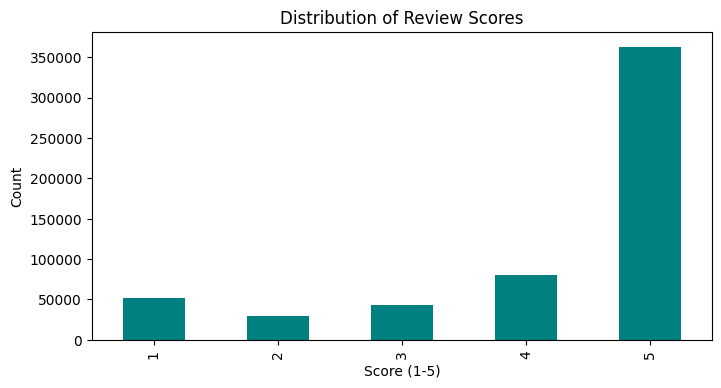

In [ ]:
score_counts = df['Score'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
score_counts.plot(kind='bar', color='teal')
plt.title('Distribution of Review Scores')
plt.xlabel('Score (1-5)')
plt.ylabel('Count')
plt.show()

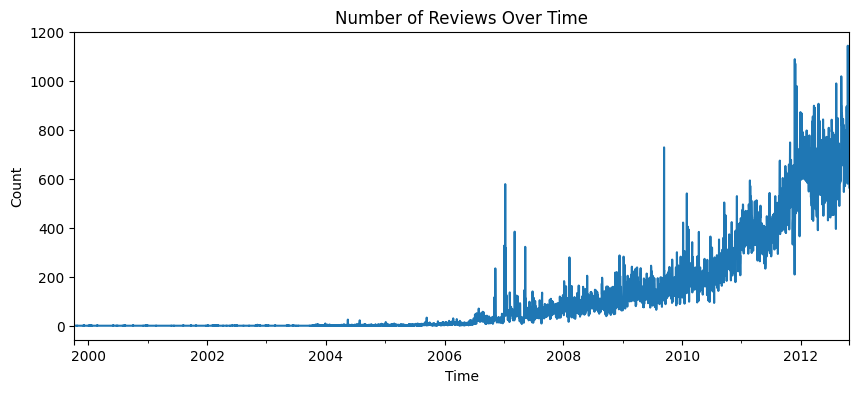

In [ ]:
# Reviews over time
df.set_index('Time')['Id'].resample('D').count().plot(figsize=(10, 4))
plt.title('Number of Reviews Over Time')
plt.ylabel('Count')
plt.show()

In [ ]:
# Top 10 users with the most reviews
top_users = df['UserId'].value_counts().head(10)
print("Top reviewers:\n", top_users)

# Top 10 products with the most reviews
top_products = df['ProductId'].value_counts().head(10)
print("Top reviewed products:\n", top_products)

Top reviewers:
 UserId
A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
A1TMAVN4CEM8U8    204
A2MUGFV2TDQ47K    201
A3TVZM3ZIXG8YW    199
A3PJZ8TU8FDQ1K    178
AQQLWCMRNDFGI     176
Name: count, dtype: int64
Top reviewed products:
 ProductId
B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
B003B3OOPA    623
B001EO5Q64    567
B000VK8AVK    564
B0026KNQSA    564
B007M83302    564
Name: count, dtype: int64


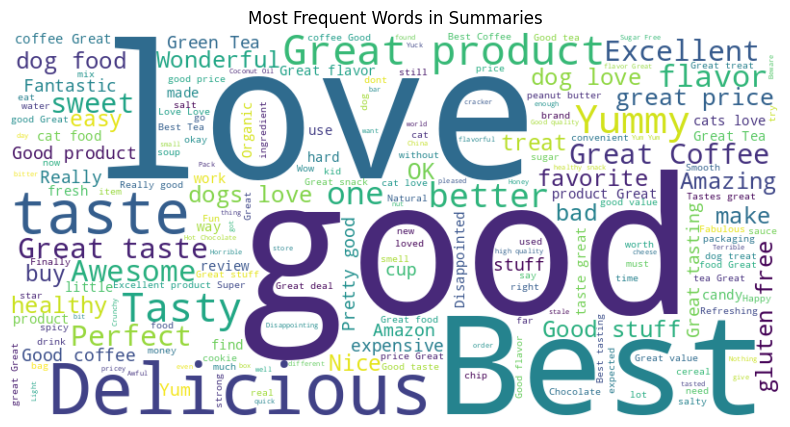

In [ ]:
from wordcloud import WordCloud

# Word cloud for Summary
summary_text = ' '.join(df['Summary'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Summaries')
plt.show()